# **Machine Learning For Big Data - Assignment 1**                                                                

---


### Shruthi Kalsapura Ramesh - B00822766
---


> 


### **1.   Download zip file and extract it. Consider this data is a subset of full Reuters corpus to make it possible for you to process without the need of a powerful server.**

I downloaded the provided data file and extracted the main (Data) folder initially using zipfile library.



In [52]:
#Unzipping the main 'Data' zip file with the help of zipfile library
import zipfile,fnmatch,os
import fnmatch,os
import glob
import os
from bs4 import BeautifulSoup
import csv
import pandas as pd
from zipfile import ZipFile

with ZipFile('Data.zip', 'r') as zipFolder:
   # Extract all the contents of zip file in current directory
    zipFolder.extractall()




### **3.   Write a function extract a Pandas's Dataframe containing: (1) headline, (2) text, (3) bip:topics,(4) dc.date.published, (5) itemid, (6) XMLfilename**











*   The 'extractAtt' function extracts headline, text, bip:topics, dc.date.published and xml filename from each file using beautiful soup library. 
*   Each bip topics from every file were extracted and stored as comma separated list.
*   Columns with multiple bip topics were split into multiple rows to get single bip topic in each row.






In [42]:
#function to extract headline, text, published date, itemid, bip topics and filename from xml files
def extractAtt(soup,filename):
    #a list to hold the extracted data that will be added to a dataframe in later stages
    content=[]
    #Extracting text tag from file
    if soup.findAll("text"):
        text=soup.findAll("text")[0].text
        content.append(text.strip())
    else:
      #if text tag does not exist in the file append empty string to the list
        content.append('')
    if soup.findAll("headline"):
        headline=soup.findAll("headline")[0].text.strip()
        content.append(headline)
    else:
        content.append('')
    if soup.findAll("dc", {"element": "dc.date.published"}):
        dcPublished=soup.findAll("dc", {"element": "dc.date.published"})[0]["value"]
        content.append(dcPublished)
    else:
        content.append('')
    if soup.findAll("newsitem"):
        itemid=soup.findAll("newsitem")[0]["itemid"]
        content.append(itemid)
    else:
        content.append('')
    if soup.findAll("codes",{"class" : "bip:topics:1.0"}):
        biptop=soup.findAll("codes",{"class" : "bip:topics:1.0"})
        code=[]
        #extracting each bip topic from a file
        for tags in biptop[0].findAll("code"):
            code.append(tags["code"])
        biptop=','.join(code)    
        content.append(biptop)
    else:
        content.append('')
    content.append(filename.decode())
    #return the extracted data
    return content



### **4.   Write a python function to find all the possible values for bip:topics. Consider that each news can belong to more than one topic.**

In [ ]:
#splitting column into multiple rows based on the comma separated values of bip topic
def splittopic(df):
    s1 = df.biptopic.str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)
    df1 = pd.concat([s1], axis=1, keys=['biptopic'])
    df= df.drop(['biptopic'], axis=1).join(df1).reset_index(drop=True)
    #Considering only one bip topic (first one) from each file and dropping other topics
    df=df.drop_duplicates(subset='xmlfilename', keep="first")
    df=df.reset_index(drop=True)
    return df




### **2.   Each file contains some XML files. Explore XML files and find a list of all fields available there**




*  Created a dataframe to store the extracted data.
*  Extracted each zipped folder in the root folder.
*  Fetched each XML file under the extracted folder.
*  Retrieved the content of each file using Beautiful Soup library
*  Stored the scraped data in the dataframe

In [44]:
# Method to fetch the content of each xml file extract all zipped files inside the main folder 'Data' 
def getfile():
  # Create a dataframe with the required headers
  df = (pd.DataFrame(columns=['text','headline','dc date Published','itemid','biptopic','xmlfilename']))
  # Path of the main directory
  rootPath = r"Data"
  pattern = '*.zip'
  for root, dirs, files in os.walk(rootPath):
      for filename in fnmatch.filter(files, pattern):        
          folder = os.fsencode(os.path.join(root, os.path.splitext(filename)[0]))
          #extracting zipped files
          zipfile.ZipFile(os.path.join(root, filename)).extractall(os.path.join(root, os.path.splitext(filename)[0]))
          #iterating through each file in each folder
          for filename in os.listdir(folder):
              path=os.path.join(folder,filename)
              #fetching only XML files
              if (filename).endswith(str.encode('.xml')):
                  with open(path, 'r') as file:
                    #To extract tags using beautiful soup
                      soup = BeautifulSoup(file)
                      #required data
                      content=extractAtt(soup,filename)
                      #adding content to dataframe 
                      df = df.append(dict(zip(df.columns, content)),ignore_index=True)
  #exploding columns
  return splittopic(df)

df=getfile()

# Creating CSV with extracted values 



In [45]:
#I created a CSV file with all the bip topics before dropping topics except first one. The following is the data with all the bip topics

import csv
import pandas as pd
df2 = pd.read_csv(r"data.csv")

,Unnamed: 0,text,headline,dc date published,itemid,xmlfilename,biptopic
0,0,* Council Regulation (EC) No 390/97 of 20 Dece...,OFFICIAL JOURNAL CONTENTS - OJ L 66 OF MARCH 6...,1997-03-10,429411,429411newsML.xml,G15
1,1,* Council Regulation (EC) No 390/97 of 20 Dece...,OFFICIAL JOURNAL CONTENTS - OJ L 66 OF MARCH 6...,1997-03-10,429411,429411newsML.xml,GCAT
2,2,* (Note - contents are displayed in reverse or...,OFFICIAL JOURNAL CONTENTS - OJ C 74 OF MARCH 8...,1997-03-10,429412,429412newsML.xml,G15
3,3,* (Note - contents are displayed in reverse or...,OFFICIAL JOURNAL CONTENTS - OJ C 74 OF MARCH 8...,1997-03-10,429412,429412newsML.xml,GCAT
4,4,* (Note - contents are displayed in reverse or...,OFFICIAL JOURNAL CONTENTS - OJ C 73 OF MARCH 8...,1997-03-10,429413,429413newsML.xml,G15
5,5,* (Note - contents are displayed in reverse or...,OFFICIAL JOURNAL CONTENTS - OJ C 73 OF MARCH 8...,1997-03-10,429413,429413newsML.xml,GCAT
6,6,* (Note - contents are displayed in reverse or...,OFFICIAL JOURNAL CONTENTS - OJ L 68 OF MARCH 8...,1997-03-10,429414,429414newsML.xml,G15
7,7,* (Note - contents are displayed in reverse or...,OFFICIAL JOURNAL CONTENTS - OJ L 68 OF MARCH 8...,1997-03-10,429414,429414newsML.xml,GCAT
8,8,DATE PROV MAT C$AMT AVG CHG PRICE ...,Canada provincial T-bill auction results - Man...,1997-03-10,429415,429415newsML.xml,M13
9,9,DATE PROV MAT C$AMT AVG CHG PRICE ...,Canada provincial T-bill auction results - Man...,1997-03-10,429415,429415newsML.xml,M131


Bip topics:  ['C11' 'C12' 'C13' 'C14' 'C15' 'C151' 'C152' 'C16' 'C17' 'C171' 'C173'
 'C18' 'C181' 'C182' 'C183' 'C21' 'C22' 'C23' 'C24' 'C31' 'C32' 'C33'
 'C34' 'C41' 'C42' 'CCAT' 'E11' 'E12' 'E13' 'E131' 'E132' 'E14' 'E141'
 'E143' 'E21' 'E31' 'E41' 'E411' 'E51' 'E512' 'E61' 'E71' 'ECAT' 'G15'
 'G151' 'G152' 'G153' 'G154' 'G155' 'G158' 'GCAT' 'GCRIM' 'GDEF' 'GDIP'
 'GDIS' 'GENT' 'GENV' 'GFAS' 'GJOB' 'GPOL' 'GREL' 'GSPO' 'GVIO' 'M11'
 'M12' 'M13' 'M131' 'M132' 'M14' 'M141' 'M142' 'MCAT']
Numberof unique bip topics:  72
Null bip topics after dropping rows with null bip topic values:  0
Length of data frame with first biptopic for each file 48257


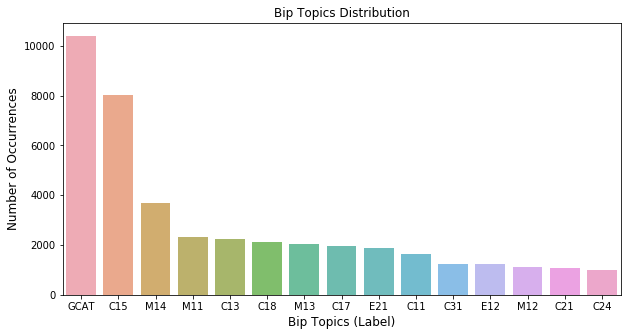

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
def dropduplicate():
    global df
    
    # Dropping rows with empty bip topic
    df = df[pd.notnull(df['biptopic'])]
    df=df.reset_index(drop=True)
    # Unique values of bip topic
    print("Bip topics: ",df.biptopic.sort_values().unique())
    print("Numberof unique bip topics: ",len(df.biptopic.sort_values().unique()))
    print("Null bip topics after dropping rows with null bip topic values: ",df["biptopic"].isnull().sum())
    #length of the dataframe
    print("Length of data frame with first biptopic for each file",len(df))
    topic_count  = df['biptopic'].value_counts()
    topic_count = topic_count[:15,]
    plt.figure(figsize=(10,5))
    sns.barplot(topic_count.index, topic_count.values, alpha=0.8)
    plt.title('Bip Topics Distribution')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Bip Topics (Label)', fontsize=12)
    plt.show()
dropduplicate()


In [15]:
#data with only one bip topic (first one) for each file and drop rows with empty bip topics
df

,Unnamed: 0,text,headline,dc date published,itemid,xmlfilename,biptopic
0,0,* Council Regulation (EC) No 390/97 of 20 Dece...,OFFICIAL JOURNAL CONTENTS - OJ L 66 OF MARCH 6...,1997-03-10,429411,429411newsML.xml,G15
1,2,* (Note - contents are displayed in reverse or...,OFFICIAL JOURNAL CONTENTS - OJ C 74 OF MARCH 8...,1997-03-10,429412,429412newsML.xml,G15
2,4,* (Note - contents are displayed in reverse or...,OFFICIAL JOURNAL CONTENTS - OJ C 73 OF MARCH 8...,1997-03-10,429413,429413newsML.xml,G15
3,6,* (Note - contents are displayed in reverse or...,OFFICIAL JOURNAL CONTENTS - OJ L 68 OF MARCH 8...,1997-03-10,429414,429414newsML.xml,G15
4,8,DATE PROV MAT C$AMT AVG CHG PRICE ...,Canada provincial T-bill auction results - Man...,1997-03-10,429415,429415newsML.xml,M13
5,11,A Spanish trawler has been banned from fishing...,Spanish trawler banned from area off Canada.,1997-03-10,429416,429416newsML.xml,C13
6,16,Canadian Imperial Bank of Commerce said on Mon...,CIBC to get Q2 C$50 million gain.,1997-03-10,429417,429417newsML.xml,C15
7,21,Canada's bond market ended Monday weaker after...,Canadian bonds close easier in thin flows.,1997-03-10,429418,429418newsML.xml,M12
8,23,Imperial Oil Ltd said it lowered the price it ...,Imperial Oil cuts Canada posted oil prices.,1997-03-10,429419,429419newsML.xml,M14
9,26,A battle between pipeline companies aiming to ...,Sable gas backers say delays threaten project.,1997-03-10,429420,429420newsML.xml,C13




### **5.   Write a function to prepare your text data by methods such as removing stop words. You are allowed to use the NLTK library. You can find more information here.**

Data was cleaned and preprocessed for better results. The steps followed are:

* Converted every text content to lower case for better comparision
* Removed numbers, punctuations, speacial characters using regular expression
* Removed non-english words (using wordnet)
* Removed english stopwords (downloaded from nlkt library).
* Performed lemmatize followed by stemming on the text.Lemmatization and stemming both together helped lessen the duplicate words and lead to the root words
* Parts of speech tagging was performed on each stemmed (root) word to categorize it into a particular part of speech
* Finally only nouns were considered for further processing since nouns are the most weighted words and are sufficient for better predictions

In [73]:
import nltk
from nltk.corpus import stopwords 
nltk.download("stopwords")
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction import text
nltk.download('punkt')
from nltk.corpus import wordnet
import re
from nltk.stem import WordNetLemmatizer, SnowballStemmer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def preprocessing():
    
  #remove stopwords, numbers, punctuations, special characters and non-english words from text
  stop=set(stopwords.words('english'))
  textData=pd.DataFrame(df.text.str.lower())
  pattern = re.compile("^[a-z]+$")
  textData['text'] = textData['text'].apply(lambda x: ' '.join([word for word in x.split() if wordnet.synsets(word) and (word not in (stop)) and pattern.match(word) ]))

  #stemming and lemmatization using SnowballStemmer and WordNetLemmatizerrespectively
  stemmer = SnowballStemmer("english")
  textData['text'] = textData['text'].apply(lambda x: ' '.join([stemmer.stem(WordNetLemmatizer().lemmatize(word)) for word in x.split()]))
  
  
  # Parts of speech tagging for each word in text
  taggedTokens=[]
  for document in textData.text:
      taggedTokens.append(nltk.pos_tag(nltk.word_tokenize(document)))
      
      
  # Extracting nouns from POS tagged data    
  nouns = ('NN',
           'NNS',
           'NNP',
           'NNPS')

  nounTokens = []
  for document in taggedTokens:
      nounsFound = []
      for taggedToken in document:
          if taggedToken[1] in nouns:
              nounsFound.append(taggedToken[0])
      nounTokens.append(nounsFound)
  
  #returning only nouns    
  return nounTokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


 

### **6.   Extract features from the text using any approach you like. Write a function that input the Dataframe in step 3 and generates a new Dataframe of your features and labels.**


* Features were extracted with term frequency - inverse document frequency (TF-IDF) scores. This approach was chosen mainly because it focuses on the prominant and unique words that are crucial for classifying them to a particular category.
* A data frame is created using the extracted featutres (words and their tf-id score) with feature names as columns.
* Lastly bip topic column from the actual dataframe is added to the current dataframe to get full-fledged features-labels set.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Extraction of features using term frequency, inverse document frequency method
def featureExtraction():
  #data cleaning and preprocessing
  nounTokens=preprocessing()
  vectorizer = TfidfVectorizer(max_df=30000,min_df=6)
  X = vectorizer.fit_transform([' '.join(x) for x in nounTokens])
  feature_names = vectorizer.get_feature_names()
  print("Shape of the tf-idf transformed data: ",X.shape)
  #Creating a data frame with term frequency and inverse document frequency values
  tfidfDataframe = pd.DataFrame(X.todense(), columns=list(vectorizer.get_feature_names()))
  tfidfDataframe['biptopic']=df['biptopic'].astype(str)
  return tfidfDataframe

In [27]:
#dataframe with final feature and labels
tfidf_feature_label=featureExtraction()

Shape of the tf-idf transformed data:  (48257, 9827)


In [28]:
tfidf_feature_label

,aa,aaa,aar,aaron,ab,abandon,abat,abattoir,abb,abbey,...,zip,zloti,zola,zone,zoo,zoom,zr,zulu,zurich,biptopic
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.057275,0.0,0.0,0.0,0.0,0.0,G15
1,0.0,0.0,0.0,0.0,0.017985,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,G15
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,G15
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,G15
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,M13
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,C13
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,C15
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,M12
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,M14
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,C13




### **7.   Divide your data into a training and test set. You can use any method such as cross-validation. You need to provide a reason why you decide so here.**


I have used train_test_split class from model_selection library. This method fecilitates dividing the dataset into training and the testing sets in various proportions in a random manner. Since the given dataset has a significant amount of entries, test_train_split was chosen to split the dataset into training and testing sets. Also, cross_validation would take a toil on the processor and eventually consumes significant amount of time as compared to train_test_split.

Here, the data is split into the ratio of 8:2 of training and testing data respectively.

In [29]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(tfidf_feature_label.loc[:, tfidf_feature_label.columns != 'biptopic'],
                                                    LabelEncoder().fit_transform(tfidf_feature_label['biptopic']),
                                                     test_size=0.2,
                                                     random_state=11)

In [70]:
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import GridSearchCV
f1_scorer = make_scorer(f1_score,average='micro')

### **9. Write a function to evaluate the quality of your classifier (like accuracy, F-score, AUC, ...). Explain why you think this function is the best choice**

I chose F-score to evaluate the quality of classifier. I based my selection on the following reasons: 

* As we can see in the confusion matrix plotted below using Decision tree classifier for predictions, there exists imbalance between classes. Due to this imbalance, F1-score is a better metric to evaluate the trained model. Since we attempt to balance how many predictions were correct (Precision) and how many of the possible correct predictions were made(Recall), F1-score is a better measure in comparison to accuracy.

* As proven generally, F1-score is better metric for text processing and it aligns better with human interpretations and judgements.


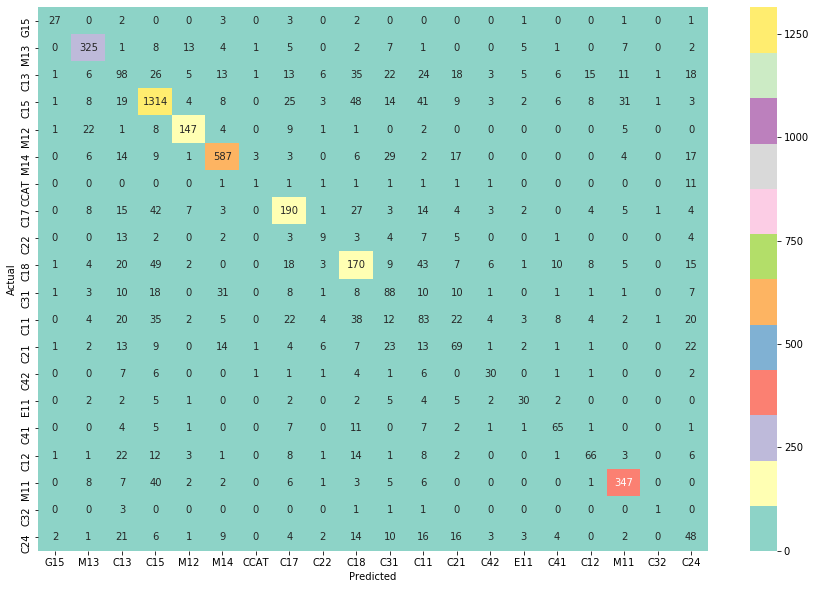

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import tree
clfDT = tree.DecisionTreeClassifier()
clfDT.fit(X_train, y_train)
enc = LabelEncoder().fit(tfidf_feature_label['biptopic'])
encoded = enc.transform(tfidf_feature_label['biptopic'])
y_pred = clfDT.predict(X_test)
labels= tfidf_feature_label['biptopic'].unique()[:20]
conf_mat = confusion_matrix(y_test, y_pred, enc.transform(labels))

# Plot confusion_matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_mat,annot=True, cmap = "Set3", fmt ="d", xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
def calculateFscore():
    Score=round(f1_score(y_test,y_pred_acc,average='micro')*100,2)
    print('Prediction f1 Score : ' , Score, '%')

### **8.   Write a function to get the Dataframe of step 6 and a set of parameters to return a trained classifier to classify all labels that you get in step 4.**

The following function takes mode (tuning/default), model name (SVM, Random forest, etc,.), model function and parameters for grid search (empty in case of default mode). It calculates predicted values for the model and predicted values, best score in case grid search for parameter tuning.


            

In [31]:

def paramtuning(mode,modName, model,param_grid={}):
  y_pred_acc=0.0
  # mode 'tuning' is when the model's hyper parameters are tuned using grid search cross validation.   
  if mode=='tuning':
    grid_clf_acc = GridSearchCV(model, param_grid = param_grid,scoring = f1_scorer)
    grid_clf_acc.fit(X_train, y_train)

    #Predict values based on new parameters
    y_pred_acc = grid_clf_acc.predict(X_test)
    bestScore=round((grid_clf_acc.best_score_)*100,2)
    params=grid_clf_acc.best_params_
    print('Grid search best parameters', grid_clf_acc.best_params_)
    print('Grid search best score',bestScore, '%')
  #default mode when the training and testing data were directly fit into the model and the prediction on test data is done.
  else:
    model.fit(X_train, y_train)
    y_pred_acc = model.predict(X_test)
  calculateFscore(y_pred_acc)

### **10. Generate five different classifiers (Random Forest, Decision Tree, Linear Regression, Neural Network, and SVM) using step 8. Tune them up for the best parameters. Find the best classifier. Explain why.**

**Generating classifiers**

###### SVM

In [ ]:
from sklearn import svm
clfSVM = svm.SVC(kernel='rbf')
paramtuning('default','SVM',clfSVM)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Prediction f1 Score :  76.29 %


##### RandomForest

In [1]:
from sklearn.ensemble import RandomForestClassifier
clfRFR=RandomForestClassifier(n_estimators=100)
paramtuning('default','Random forest',clfRFR)

Prediction f1 Score :  72.86 %


##### Decision Tree

In [2]:
from sklearn import tree
clfDT = tree.DecisionTreeClassifier()
paramtuning('default','Decision Tree',clfDT)

Prediction f1 Score :  62.4 %


##### Neural Networks - MLP Classifier

In [3]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
paramtuning('default','Neural Networks',mlp)

Prediction f1 Score :  74.84 %


##### Linear Regression

Linear regression is used for predicting continuous values that can range from negative infinity to positive infinity. It is very sensitive to the change in values. As the target is not a continuous value with classifications, linear regression is highly prone to errors and performs poorly. Hence not suitable for the given classification problem.


In [34]:
from sklearn.linear_model import LinearRegression
LNR = LinearRegression()

LNR.fit(X_train, y_train)
y_pred_acc = LNR.predict(X_test)

print ("r2 / variance : ",LNR.score(X_train,y_train))
print("Residual sum of squares: %.2f"
              % np.mean((y_pred_acc - y_test) ** 2))

r2 / variance :  0.8046598624896515
Residual sum of squares: 222.67


## **Tuning classifiers**

#### SVM

In [60]:
from sklearn import svm

clfSVM = svm.SVC()
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs ,'gamma' : gammas}
paramtuning('tuning','SVM',clfSVM,param_grid)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Grid search best parameters GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=micro), verbose=0)
Grid search best score 64.4 %
Prediction f1 Score :  65.9 %


#### Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
clfRFR = RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80,90,100],
    'max_features': [2,3],
    'min_samples_leaf': [3],
    'min_samples_split': [8,10,12],
    'n_estimators': [10]
}
paramtuning('tuning','Random forest',clfRFR,param_grid)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Grid search best parameters GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              wa

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Decision Tree

In [114]:
from sklearn import tree
clfDT = tree.DecisionTreeClassifier()
param_grid = {'min_samples_split' : range(5,300,10),'max_depth': range(1,20,2)}
paramtuning('tuning','Decision Tree',clfDT,param_grid)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Grid search best parameters GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_split': ra

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Linear Regression

Linear regression does not perform well for classication problem. Therefore, the the error rate is high (Residual sum of squares) and the score is less (r2/ variance)

In [18]:
from sklearn.linear_model import LinearRegression
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
clfLNR = LinearRegression()
grid_clf_acc = GridSearchCV(clfLNR,param_grid, cv=None)
grid_clf_acc.fit(X_train, y_train)
y_pred_acc = grid_clf_acc.predict(X_test)
print ("r2 / variance : ", grid_clf_acc.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((y_pred_acc - y_test) ** 2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


r2 / variance :  -1.4270793713773983e+21
Residual sum of squares: 2344448950285142589440.00


#### Neural Networks - MLP Classifier

In [118]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(100,),(5,2,)],
    'activation': ['relu'],
    'solver': ['adam','sgd'],
    'alpha': [0.0001,0.05],
    'learning_rate': ['constant','adaptive'],
}

paramtuning('Neural Networks',mlp,param_grid)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter,

Grid search best parameters GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     rando...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['relu'], 'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### **Best Classifier**

* After meticulous observation of performance of all the models (except linear regression) before and after tuning, it is evident that Support Vector Machine (SVM) emerges out as the best classifiers. 

* SVM uses overfitting protection mechanism that makes it less dependant on the number of features and hence it is efficient in handling a plethora of features as in the given case.  
* The features extracted are very sparse, because of which SVM can draw clear boundaries between labels. Hence, SVM performs well with the given problem

In [72]:
# Creating a dataframe with scores for each model
attributes= (pd.DataFrame(columns=['Model','Score (%)','Tuning Score (%)']))
attributes=attributes.append(dict(zip(attributes.columns, ['SVM',76.29,64.4])),ignore_index=True)
attributes=attributes.append(dict(zip(attributes.columns, ['Random forest',72.86,47.16])),ignore_index=True)
attributes=attributes.append(dict(zip(attributes.columns, ['Decision Tree',62.4,40.41])),ignore_index=True)
attributes=attributes.append(dict(zip(attributes.columns, ['Neural Networks',74.84,42.84])),ignore_index=True)

In [78]:
attributes.head()

,Model,Score (%),Tuning Score (%)
0,SVM,76.29,64.40
1,Random forest,72.86,47.16
2,Decision Tree,62.40,40.41
3,Neural Networks,74.84,42.84


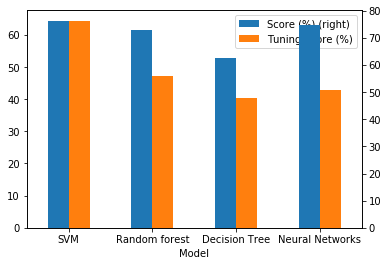

In [77]:
#plotting scores of all models before and after tuning
_ = attributes.plot( x="Model",kind= 'bar' , secondary_y= 'Score (%)' , rot= 0 )
plt.show()


## References

[1]"Interacting with CSV files using Python - Bean Coder", Bean Coder, 2019. [Online]. Available: https://beancoder.com/csv-files-using-python/. [Accessed: 25- Oct- 2019].

[2]"Pandas: Splitting (Exploding) a column into multiple rows", Medium, 2019. [Online]. Available: https://medium.com/@sureshssarda/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e. [Accessed: 25- Oct- 2019].

[3]S. dataframe, "Split cell into multiple rows in pandas dataframe", Stack Overflow, 2019. [Online]. Available: https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe. [Accessed: 25- Oct- 2019].

[4]"NLP for Beginners: Cleaning & Preprocessing Text Data", Medium, 2019. [Online]. Available: https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f. [Accessed: 25- Oct- 2019].

[5]K. Ganesan, "Tutorial: Extracting Keywords with TF-IDF and Python's Scikit-Learn", Kavita Ganesan, 2019. [Online]. 

Available: https://kavita-ganesan.com/extracting-keywords-from-text-tfidf/#.Xatr2-hKhPY. [Accessed: 25- Oct- 2019].

[6]p. Remove all special characters, A. White and G. Chauhan, "Remove all special characters, punctuation and spaces from string", Stack Overflow, 2019. [Online]. Available: https://stackoverflow.com/questions/5843518/remove-all-special-characters-punctuation-and-spaces-from-string. [Accessed: 25- Oct- 2019].

[7]"sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.21.3 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html. [Accessed: 25- Oct- 2019].

[8]"pandas.DataFrame.transpose — pandas 0.25.2 documentation", Pandas.pydata.org, 2019. [Online]. Available: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html. [Accessed: 25- Oct- 2019].

[9]"sklearn.preprocessing.LabelEncoder — scikit-learn 0.22.dev0 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html. [Accessed: 25- Oct- 2019].

[10]"Support Vector Machine — Introduction to Machine Learning Algorithms", Medium, 2019. [Online]. Available: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47. [Accessed: 25- Oct- 2019].

[11]"3.2.4.3.1. sklearn.ensemble.RandomForestClassifier — scikit-learn 0.21.3 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. [Accessed: 25- Oct- 2019].

[12]"sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html. [Accessed: 25- Oct- 2019].

[13]"1.17. Neural network models (supervised) — scikit-learn 0.21.3 documentation", Scikit-learn.org, 2019. [Online]. Available: https://scikit-learn.org/stable/modules/neural_networks_supervised.html. [Accessed: 25- Oct- 2019].

[14]"A beginner’s guide to Linear Regression in Python with Scikit-Learn", Medium, 2019. [Online]. Available: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f. [Accessed: 25- Oct- 2019].